In [11]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
import time
import scipy.stats as stats
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.linalg as la
from scipy import sparse

# Iterative Solvers Problem Set

Problem 1

In [2]:
def jacobi(A, b, tol, maxiter):
    n,n = np.shape(A)
    d = np.diagonal(A)
    x0 = np.zeros(n)
    dist=1
    iter=0 
    while (dist>tol) & (iter < maxiter):
        x = x0 + (b - A@x0)/d
        dist = la.norm(x - x0, ord = np.inf)
        x0 = x
        iter +=1
    print('Number of iterations: ', iter)
    return x

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = diag_dom(10)
b = np.random.random(10)
x= jacobi(A, b, 1e-10,500)
np.allclose(b,A@x)

Number of iterations:  24


True

Problem 2

Number of iterations:  27


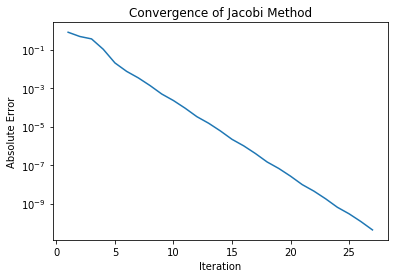

In [3]:
def jacobi(A, b, tol, maxiter, plot= False):
    n,n = np.shape(A)
    d = np.diagonal(A)
    x0 = np.zeros(n)
    dist=1
    iter=0
    error = np.empty(0)
    while (dist>tol) & (iter < maxiter):
        x = x0 + (b - A@x0)/d
        dist = la.norm(x - x0, ord = np.inf)
        error = np.append(error, dist)
        x0 = x
        iter +=1
    print('Number of iterations: ', iter)
    if plot==True:
        iteration = np.linspace(1, len(error), len(error))
        plt.plot(iteration, error)
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error')
        plt.title('Convergence of Jacobi Method')
        plt.show()
    return x, error

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = diag_dom(10)
b = np.random.random(10)
x,error= jacobi(A, b, 1e-10,500, True)

Problem 3

Number of iterations:  34


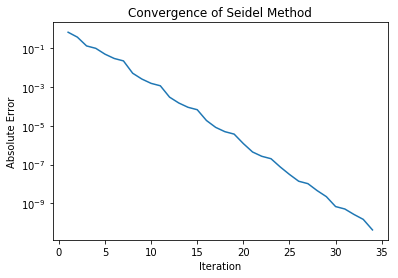

True

In [4]:
def seidel(A, b, tol, maxiter, plot= False):
    n,n = np.shape(A)
    dist = 1
    iter = 0
    errors = np.empty(0)
    x0 = np.zeros(n)
    while (dist>tol) & (iter<maxiter):
        x = np.copy(x0)
        for i in range(n):
            x[i] = x0[i]+ (1/A[i,i])*(b[i] - (A[i,:]).T@x0)
        dist = la.norm(x-x0, ord=np.inf)
        errors = np.append(errors, dist)
        iter +=1
        x0 = x
    print('Number of iterations: ', iter)
    if plot==True:
        iteration = np.linspace(1, len(errors), len(errors))
        plt.plot(iteration, errors)
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error')
        plt.title('Convergence of Seidel Method')
        plt.show()
    return x,errors

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = diag_dom(10)
b = np.random.random(10)
x,errors= seidel(A, b, 1e-10,500, True)
np.allclose(b,A@x)


        
        
        

Problem 4 

In [5]:
def prob4(A, b, tol, maxiter):
    n,n = np.shape(A)
    dist = 1
    iter = 0
    errors = np.empty(0)
    x0 = np.zeros(n)
    while (dist>tol) & (iter<maxiter):
        x = np.copy(x0)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x[i] = x0[i]+ (1/A[i,i])*(b[i] - A.data[rowstart:rowend]@x0[A.indices[rowstart:rowend]])
        dist = la.norm(x-x0, ord=np.inf)
        errors = np.append(errors, dist)
        iter +=1
        x0 = x
    print('Number of iterations: ', iter)
    return x,errors

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
x,errors= prob4(A, b, 1e-15,500)
np.allclose(b,A@x)
    

Number of iterations:  23


True

Problem 5

In [6]:
def prob5(A, b, w, tol, maxiter):
    n,n = np.shape(A)
    dist = 1
    iter = 0
    errors = np.empty(0)
    x0 = np.zeros(n)
    while (dist>tol) & (iter<maxiter):
        x = np.copy(x0)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x[i] = x0[i]+ (w/A[i,i])*(b[i] - A.data[rowstart:rowend]@x0[A.indices[rowstart:rowend]])
        dist = la.norm(x-x0, ord=np.inf)
        errors = np.append(errors, dist)
        iter +=1
        x0 = x
    print('Number of iterations: ', iter)
    return x,errors

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = sparse.csr_matrix(diag_dom(1000))
b = np.random.random(1000)
x,errors= prob5(A, b, 1.3, 1e-15,500)
np.allclose(b,A@x)

Number of iterations:  55


True

Problem 6

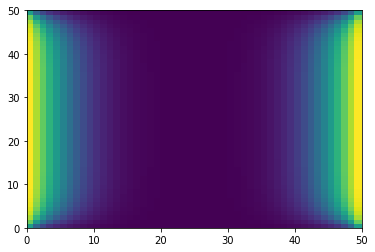

100

In [7]:
def prob_5(A, b, w, tol, maxiter):
    n,n = np.shape(A)
    dist = 1
    iter = 0
    errors = np.empty(0)
    x0 = np.zeros(n)
    while (dist>tol) & (iter<maxiter):
        x = np.copy(x0)
        for i in range(n):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            x[i] = x0[i]+ (w/A[i,i])*(b[i] - A.data[rowstart:rowend]@x0[A.indices[rowstart:rowend]])
        dist = la.norm(x-x0, ord=np.inf)
        errors = np.append(errors, dist)
        iter +=1
        x0 = x
    return x,iter


def prob6(n, w, tol=10e-8, maxiter=100, plot=False):
    ones = np.ones(n-1)
    fours = -4*np.ones(n)
    B = np.diag(fours)
    np.fill_diagonal(B[1:], ones)
    np.fill_diagonal(B[:, 1:], ones)
    I = np.eye(n)
    BB = np.eye(n)
    II = np.zeros((n, n))
    np.fill_diagonal(II[1:], ones)
    np.fill_diagonal(II[:, 1:], ones)
    A = np.kron(II, I) + np.kron(BB, B)
    A_use = sparse.csr_matrix(A)
    b_tile = np.zeros(n)
    b_tile[0] = -100
    b_tile[-1] = -100
    b = np.tile(b_tile, n) 
    x, iter = prob_5(A_use, b, w, tol=tol, maxiter=maxiter)
    if plot == True:
        x_grid = np.reshape(x, (n,n))
        plt.pcolormesh(np.linspace(0, n, n+1), np.linspace(0, n, n+1), x_grid)
        plt.show()
    return iter


prob6(50, 1.0, plot=True)

Problem 7

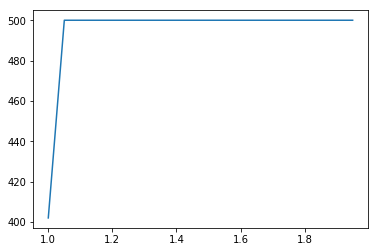

In [13]:
w_7 = np.linspace(1, 1.95, 20)
iterations = np.zeros(20)
for i in range(20):
    iterations[i] = prob6(20, w_7[i], tol=1e-2, maxiter = 500, plot=False)
plt.plot(w_7, iterations)
plt.show()